<h3>Implementação da classe LVQ</h3>

In [1]:
import csv
import random
import numpy as np
import scipy.spatial as spatial

class LVQ(): 
    def __init__(self, dataset):
        """
        Construtor da classe
        :param nome_arquivo: nome do arquivo csv que contem os dados
        """
        self.dados = dataset
        self.dataset = dataset
        self.qtd_caracteristicas = 0
        self.amplitudes = []
        self.qtd_caracteristicas = len(self.dados[0])-1
        
    def normalizar(self):
        """
        Normalized all the characteristics for a range of 0 - 1, for all have the same weight in the
        """
        lista = []*(len(self.dados[0])-1)
        self.amplitudes = []
        for caracteristica in range(len(self.dados[0])-1):
            lista = [elemento[caracteristica] for elemento in self.dados]
            self.amplitudes += [[max(lista), min(lista)]]
            for elemento in self.dados:
                elemento[caracteristica] = (elemento[caracteristica] - min(lista))/(max(lista)+min(lista))
        
    def triagem(self, split: float=0.65):
        """
        Divide randomly the elements of the data set into two subsets: test and training
         : param split: from 0 to 1 -> 'percentage' of the elements that will be in the training set
        """        
        self.treino, self.teste = [], []
        for elemento in self.dados:
            if random.random() < split:
                self.treino += [elemento]
            else:
                self.teste += [elemento]
    
    def resumir(self, n: float=10,  e: float=10, t: float=0.4):
        """
        Returns the data codebook, that is, the elements that best represent the whole
         : param t: initial learning rate
         Parameters: number of times
         : param n: number of coodbook elements
        """
        #Geracacao aleatorio dos elementos iniciais do codebook         
        #Random Geracacao of the initial elements of the codebook
        self.codebook = [[]]*n
        for i in range(n):
            self.codebook[i] = [0] * (self.qtd_caracteristicas + 1)
            for caracteristica in range(self.qtd_caracteristicas + 1):
                self.codebook[i][caracteristica] = random.choice(self.dados)[caracteristica]

        for epoca in range(e):
            taxa = t * (1.0-(epoca/float(e)))
            for elemento in self.treino:
                representante = self.encontrar_mais_proximo(elemento, self.codebook)
                o = -1
                if representante[-1] == elemento[-1]:
                    o = 1
                for caracteristica in range(self.qtd_caracteristicas):
                    erro = (elemento[caracteristica]-representante[caracteristica]) 
                    representante[caracteristica] += (erro * taxa * o)
      
    def testar(self):
        """
        Performs the classification for each element of the test set and returns the accuracy of the algorithm
        """
        qtd_teste = len(self.teste)
        precisao = 100.0
        for elemento in self.teste: 
            bmu = self.encontrar_mais_proximo(elemento, self.codebook)
            if bmu[-1] != elemento[-1]:
                precisao -= (1/qtd_teste)*100
 
        return precisao
    
    def encontrar_mais_proximo(self, elemento, lista):
        """
        Performs the classification for each element of the test set and returns the accuracy of the algorithm
         : param element: vector to which the nearest vector of a given list is due
         : stop list: list of vectors
        """
        resposta = [lista[0], spatial.distance.euclidean(elemento[0:-1], lista[0][0:-1])]
        for i in lista:
            distancia = spatial.distance.euclidean(elemento[0:-1], i[0:-1])
            if distancia < resposta[1]: 
                resposta = [i, distancia]
        return resposta[0]
    
    @property
    def representantes(self):
        """
        Returns the "original" codebook, with the characteristics in their original ranges. That is,
         returns the denormalized codebook, if it has been normalized
        """
        representantes_desnormalizados = [[]]*len(self.codebook)
        if self.amplitudes:
            for index, representante in enumerate(self.codebook): 
                representante_desnormalizado = []
                for caracteristica in range(self.qtd_caracteristicas):
                    aux = ((self.amplitudes[caracteristica][0] + self.amplitudes[caracteristica][1])\
                          * representante[caracteristica]) + self.amplitudes[caracteristica][1]
                    representante_desnormalizado += [aux]
                representante_desnormalizado += [representante[-1]]    
                representantes_desnormalizados[index] = representante_desnormalizado
        else: 
            return self.codebook
        
        return representantes_desnormalizados
    
    @property
    def classes(self): 
        """
        Returns the classes in the dataset
        """
        classes = []
        for elemento in self.dados:
            if elemento[-1] not in classes:
                classes.append(elemento[-1])
        
        return classes

<h3>Algumas outras funções utilizadas</h3>

In [2]:
import random 
def importar_dataset(arquivo_csv: str=None):
        """
        Loads the initial data of the class through a csv file. Expect a file to have rows
         with n columns, so that n-ezima represents the class of the element and the previous ones represent,
         each one a different characteristic.
         : stop csv file: csv file name
        """
        dados = []
        with open(arquivo_csv, 'r') as arquivo_csv:
            arquivo = csv.reader(arquivo_csv)
            for index, linha in enumerate(arquivo):
                if linha:
                    dados += [list(map(float, linha[0:-1]))]
                    dados[index] += [linha[-1]]
        return dados

def random_cores(qtd: int=3): 
    """
    Randomly return colors in hexadecimal format according to the requested quantity
    """
    lista = [(210,180,140), (139,69,19), (244,164,96), (85,107,47), (0,255,0), (102,205,170), (127,255,212),
            (72,209,204), (0,255,255), (176,196,222), (30,144,255), (0,0,255), (220,20,60), (255,105,180), 
             (255,0,255), (139,0,139), (255,192,203), (255,0,0), (250,128,114), (255,165,0), (255,255,0)]
    
    random.shuffle(lista)
    cores = lista[0:qtd]
    resposta = []
    for cor in cores:
        resposta += ['#%02x%02x%02x' % cor]
    return resposta


<h3>Application of the LVQ class in the IRIS dataset classification</h3>

Algorithm with normalized data between 0 - 1
Precisão:  97.36842105263158 % 



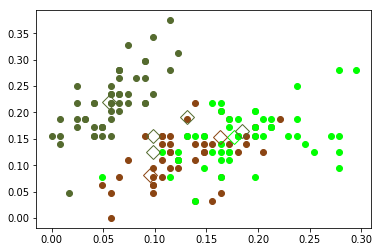

Algorithm with non-normalized data
Precisão:  91.42857142857142 % 



In [8]:
import matplotlib.pyplot as plt
dataset = importar_dataset("datas/IRIS.csv")

# Dados normalizados
print("Algorithm with normalized data between 0 - 1")
iris_norm = LVQ(dataset)
iris_norm.triagem(0.75) #screening
iris_norm.normalizar()
iris_norm.resumir(n=8, e=13, t=0.5) #summarize
print("Precisão: ", iris_norm.testar(), "% \n")
classes = iris_norm.classes

classes_cor = {}
cores = random_cores(len(classes))
for index, classe in enumerate(classes):
    classes_cor[classe] = cores[index]
    
for elemento in iris_norm.dataset:
    plt.plot(elemento[0], elemento[1], 'o', color=classes_cor[elemento[-1]])

for representante in iris_norm.codebook: 
    plt.plot(representante[0], representante[1], 'D' , ms=10, mfc='none', color=classes_cor[representante[-1]])

plt.show()
    
# Sem normalização 
print("Algorithm with non-normalized data")
iris = LVQ(dataset)
iris.triagem(0.75)
iris.resumir(n=8, e=13, t=0.5)
print("Precisão: ", iris.testar(),"% \n")
# for representante in iris.representantes:
#     print(representante)